<a href="https://colab.research.google.com/github/AshimDhakal7/Concept-and-technologies-of-AI/blob/main/ashim_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data Sets/Health_Dataset_Regression_Classification.csv")

In [ ]:
df

,Age,Gender,BMI,Smoking_Status,Exercise_Frequency,Daily_Calorie_Intake,Cholesterol_Level,Blood_Pressure,Annual_Medical_Expenses,Expense_Category
0,70,Female,32.1,Smoker,Rare,3859,204.4,160,40682.11,High
1,44,Male,31.2,Non-Smoker,Rare,2985,177.6,92,18841.62,Low
2,78,Male,30.4,Smoker,Regular,1263,168.3,147,40634.17,High
3,49,Male,35.9,Smoker,Regular,2077,194.5,92,15502.86,Low
4,59,Female,25.0,Smoker,Occasional,1305,185.7,93,41319.25,High
...,...,...,...,...,...,...,...,...,...,...
1495,67,Female,37.9,Non-Smoker,Occasional,2519,161.1,179,14852.76,Low
1496,29,Male,38.4,Non-Smoker,Occasional,2414,207.7,170,31010.89,High
1497,21,Female,27.0,Smoker,Regular,2340,180.8,108,18856.55,Low
1498,69,Female,23.5,Non-Smoker,Occasional,1943,254.8,164,17905.29,Low


In [ ]:
#display the first 10 rows.
df.head(10)




,Age,Gender,BMI,Smoking_Status,Exercise_Frequency,Daily_Calorie_Intake,Cholesterol_Level,Blood_Pressure,Annual_Medical_Expenses,Expense_Category
0,70,Female,32.1,Smoker,Rare,3859,204.4,160,40682.11,High
1,44,Male,31.2,Non-Smoker,Rare,2985,177.6,92,18841.62,Low
2,78,Male,30.4,Smoker,Regular,1263,168.3,147,40634.17,High
3,49,Male,35.9,Smoker,Regular,2077,194.5,92,15502.86,Low
4,59,Female,25.0,Smoker,Occasional,1305,185.7,93,41319.25,High
5,26,Female,38.5,Non-Smoker,Regular,1729,166.9,156,20938.28,Low
6,35,Female,20.2,Smoker,Regular,1899,207.7,179,32898.49,High
7,58,Male,39.1,Non-Smoker,Regular,2918,190.3,124,9596.87,Low
8,44,Female,29.0,Non-Smoker,Rare,1791,238.7,168,29440.64,High
9,42,Female,38.5,Non-Smoker,Occasional,2465,190.5,152,33027.58,High


In [ ]:
#Identify the number of rows and columns in the dataset.
row=len(df.index)
print(f"no of row = {row}.")
columns=len(df.columns)
print(f"no of columns = {columns}.")


no of row = 1500.
no of columns = 10.


In [ ]:
#List all the columns and their data types.
print("All the columns and their data types :- ")
print(df.dtypes)

All the columns and their data types :- 
Age                          int64
Gender                      object
BMI                        float64
Smoking_Status              object
Exercise_Frequency          object
Daily_Calorie_Intake         int64
Cholesterol_Level          float64
Blood_Pressure               int64
Annual_Medical_Expenses    float64
Expense_Category            object
dtype: object


In [ ]:
 df.describe()

,Age,BMI,Daily_Calorie_Intake,Cholesterol_Level,Blood_Pressure,Annual_Medical_Expenses
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,48.266000,29.053000,2557.171333,226.567733,133.899333,27289.259113
std,17.903806,6.322256,813.190016,43.867439,26.250624,12904.121856
min,18.000000,18.500000,1203.000000,150.100000,90.000000,5002.640000
25%,33.000000,23.400000,1852.000000,188.075000,111.000000,15833.477500
50%,48.000000,28.900000,2518.000000,227.150000,133.000000,27504.685000
75%,64.000000,34.500000,3275.750000,263.725000,156.000000,38269.815000
max,79.000000,40.000000,3997.000000,300.000000,179.000000,49985.350000


In [ ]:
#checking missing file
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Age                        0
Gender                     0
BMI                        0
Smoking_Status             0
Exercise_Frequency         0
Daily_Calorie_Intake       0
Cholesterol_Level          0
Blood_Pressure             0
Annual_Medical_Expenses    0
Expense_Category           0
dtype: int64


In [ ]:
#check duplicate data
df.duplicated().sum()


0

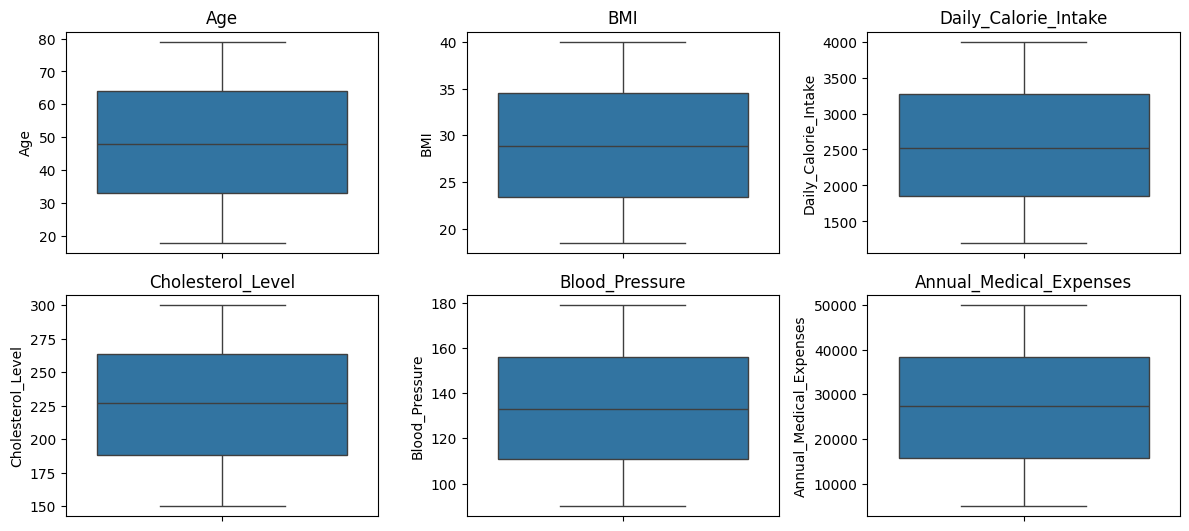

In [ ]:
#box plot
num_features = df.select_dtypes(include=['int64', 'float64'])
# Creating boxplots for each numerical feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features.columns, 1):  # Use num_features.columns
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

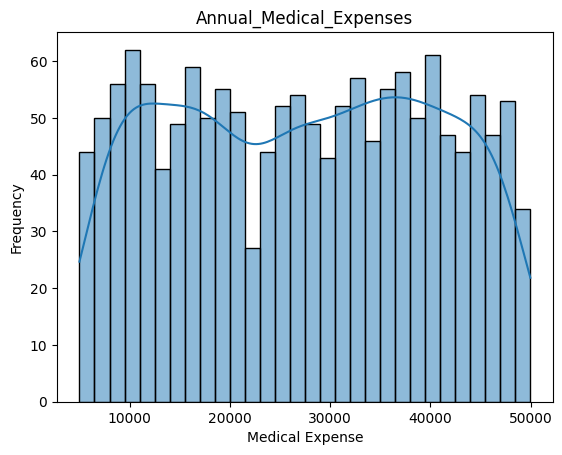

In [ ]:
sns.histplot(df["Annual_Medical_Expenses"], bins=30, kde=True)
plt.xlabel("Medical Expense")
plt.ylabel("Frequency")
plt.title("Annual_Medical_Expenses")
plt.show()


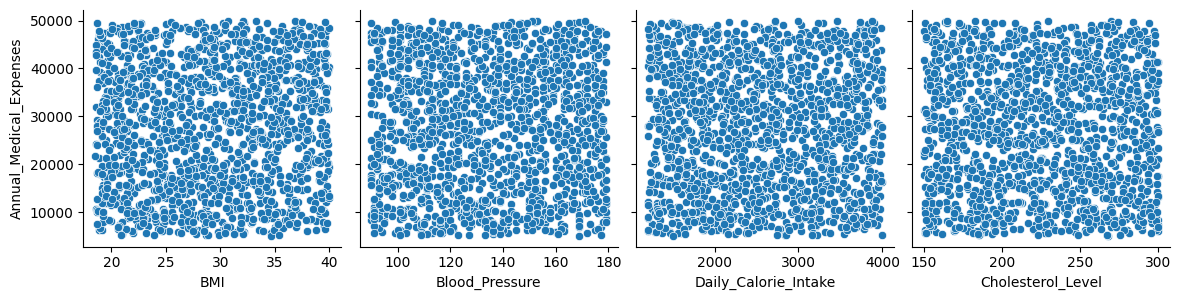

In [ ]:

# Select only numerical columns
num_features = df[["BMI","Blood_Pressure", "Daily_Calorie_Intake", "Cholesterol_Level"]]


# Create pairplot with regression line
sns.pairplot(df, x_vars=num_features, y_vars=["Annual_Medical_Expenses"], height=3, aspect=1, kind="scatter")

plt.show()


In [ ]:
num_features = df.select_dtypes(include=['int64', 'float64'])
c=num_features.corr()
c

,Age,BMI,Daily_Calorie_Intake,Cholesterol_Level,Blood_Pressure,Annual_Medical_Expenses
Age,1.000000,-0.029129,0.003551,-0.041327,-0.047454,0.045905
BMI,-0.029129,1.000000,-0.003540,-0.034707,0.046663,0.044912
Daily_Calorie_Intake,0.003551,-0.003540,1.000000,-0.004709,0.053882,-0.005197
Cholesterol_Level,-0.041327,-0.034707,-0.004709,1.000000,0.015962,-0.018733
Blood_Pressure,-0.047454,0.046663,0.053882,0.015962,1.000000,0.021828
Annual_Medical_Expenses,0.045905,0.044912,-0.005197,-0.018733,0.021828,1.000000


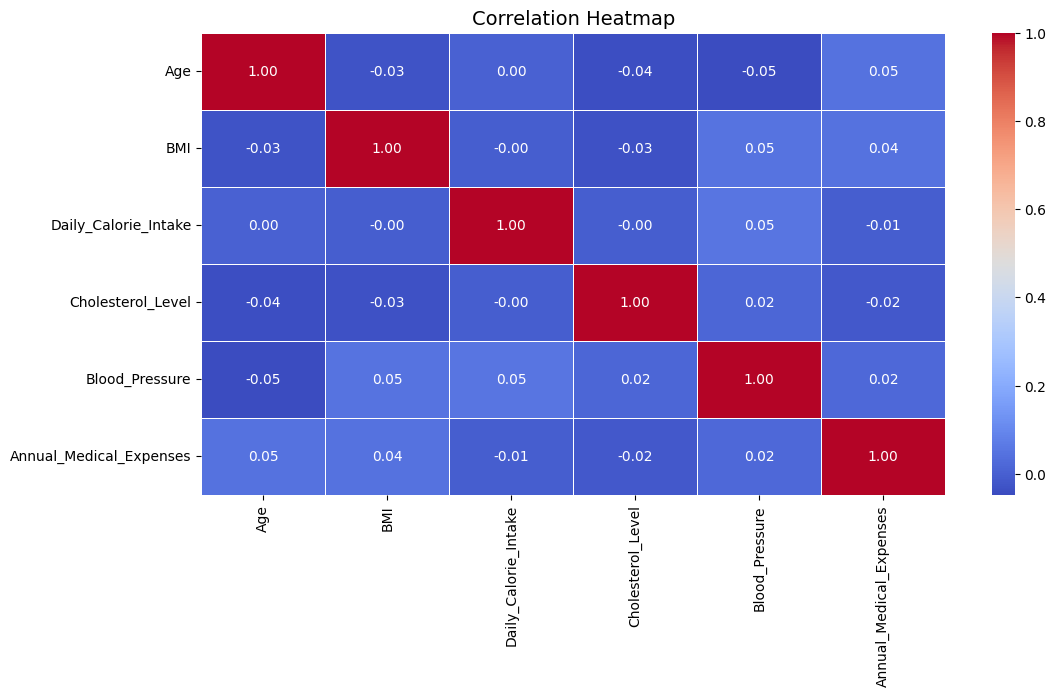

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(c, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Fix colormap
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# Encode categorical variables


# Define features (X) and target (y)

X = df.drop(['Expense_Category','Gender','Exercise_Frequency','Annual_Medical_Expenses'], axis=1)
y = df['Annual_Medical_Expenses']


df['Smoking_Status'] = e.fit_transform(df['Smoking_Status'])
df['Expense_Category']=e.fit_transform(df['Expense_Category'])


X = df.drop(['Expense_Category','Gender','Exercise_Frequency','Annual_Medical_Expenses'], axis=1)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




2. Build a Model from Scratch:

Scratch Model Performance:
 Mean Squared Error (MSE): 161100062.7813326
 Mean Absolute Error (MAE): 10961.493160283011
 R-squared (R²): -0.006741545074922417


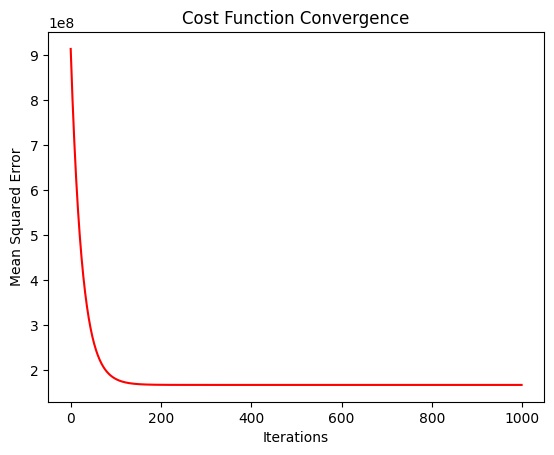

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.cost_history = []

    def fit(self, X, y):
        m, n = X.shape
        X = np.c_[np.ones(m), X]
        self.theta = np.zeros(n + 1)

        for _ in range(self.iterations):
            y_pred = X @ self.theta
            errors = y_pred - y
            gradients = (2 / m) * X.T @ errors
            self.theta -= self.learning_rate * gradients

            cost = np.mean(errors ** 2)
            self.cost_history.append(cost)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

    def plot_cost(self):
        """Plot cost function over iterations to check convergence."""
        plt.plot(range(len(self.cost_history)), self.cost_history, color='red')
        plt.xlabel("Iterations")
        plt.ylabel("Mean Squared Error")
        plt.title("Cost Function Convergence")
        plt.show()



model_scratch = LinearRegressionScratch(learning_rate=0.01, iterations=1000)
model_scratch.fit(X_train_scaled, y_train)


y_pred_scratch = model_scratch.predict(X_test_scaled)


mse_scratch = mean_squared_error(y_test, y_pred_scratch)
mae_scratch = mean_absolute_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

print("Scratch Model Performance:")
print(f" Mean Squared Error (MSE): {mse_scratch}")
print(f" Mean Absolute Error (MAE): {mae_scratch}")
print(f" R-squared (R²): {r2_scratch}")


model_scratch.plot_cost()


Build a Primary Model:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
model1 = LinearRegression()

# Fit the model to the scaled training data
model1.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model1.predict(X_test)

# Calculate performance metrics
mse_lr= mean_squared_error(y_test, y_pred)
r2_lr= r2_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"R-squared: {r2_lr:.4f}")
print(f"Mean Absolute Error: {mae_lr:.4f}")


Linear Regression:
Mean Squared Error: 916473717979.6730
R-squared: -5726.1993
Mean Absolute Error: 906219.0130


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


model2 = RandomForestRegressor(n_estimators=100, random_state=42)


model2.fit(X_train, y_train)

y_pred_rf = model2.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print performance metrics
print("Random Forest Regression:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")


Random Forest Regression:
Mean Squared Error: 180274485.9709
R-squared: -0.1266
Mean Absolute Error: 11425.3225


In [ ]:
# Compare the models based on R-squared, MSE, and MAE
if r2_rf > r2_lr:
    print("Random Forest Regressor performed better based on R-squared value.")
else:
    print("Linear Regression performed better based on R-squared value.")

if mse_rf < mse_lr:
    print("Random Forest Regressor performed better based on Mean Squared Error.")
else:
    print("Linear Regression performed better based on Mean Squared Error.")

if mae_rf < mae_lr:
    print("Random Forest Regressor performed better based on Mean Absolute Error.")
else:
    print("Linear Regression performed better based on Mean Absolute Error.")


Random Forest Regressor performed better based on R-squared value.
Random Forest Regressor performed better based on Mean Squared Error.
Random Forest Regressor performed better based on Mean Absolute Error.


4. Hyper-parameter Optimization with Cross-Validation:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameters for Linear Regression (Ridge is used for regularization)
param_grid_linear = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 500]}

# Use Ridge Regression as it allows regularization
ridge_model = Ridge()

# Perform GridSearchCV
grid_search_linear = GridSearchCV(estimator=ridge_model, param_grid=param_grid_linear, cv=5, scoring='r2')
grid_search_linear.fit(X_train, y_train)

# Best hyperparameters for Linear Regression
best_params_linear = grid_search_linear.best_params_
print("Best hyperparameters for Linear Regression (Ridge):", best_params_linear)

Best hyperparameters for Linear Regression (Ridge): {'alpha': 100}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Corrected
    'bootstrap': [True, False]
}

# Instantiate model
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
rf_cv = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=10, scoring='r2', random_state=42)
rf_cv.fit(X_train, y_train)

# Best hyperparameters
print("Best Random Forest Parameters:", rf_cv.best_params_)


Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}


5. Feature Selection :

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize model
lr_model = LinearRegression()

# Perform RFE to select the top 5 features
rfe = RFE(estimator=lr_model, n_features_to_select=4)
rfe.fit(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]

print("Selected Features Linear Regression:", list(selected_features))


Selected Features Linear Regression: ['Age', 'BMI', 'Smoking_Status', 'Blood_Pressure']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance scores
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top 5 features
selected_features = feature_importance.head(4).index.tolist()

print("Selected Features for Random Forest model:", selected_features)


Selected Features for Random Forest model: ['Cholesterol_Level', 'Daily_Calorie_Intake', 'BMI', 'Blood_Pressure']


6. Final Model:

In [ ]:
# using best  features and target variable for linear regression
features = ['Age', 'BMI', 'Smoking_Status', 'Blood_Pressure']
X = df[features]
y = df["Annual_Medical_Expenses"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a standard Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model using R², RMSE, and MAE
r2_lr_final = r2_score(y_test, y_pred)
mse_lr_final = mean_squared_error(y_test, y_pred)
mae_lr_final = mean_absolute_error(y_test, y_pred)

# Print evaluation results
print("Final Linear Regression Results:")
print(f"R² Score: {r2_lr_final:.4f}")
print(f"Mean Squared Error (RMSE): {mse_lr_final:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr_final:.4f}")


Final Linear Regression Results:
R² Score: -0.0010
Mean Squared Error (RMSE): 160181432.8855
Mean Absolute Error (MAE): 10921.0165


In [ ]:
print("Linear Regression Result:")
if r2_lr_final > r2_lr:
    print(f"R² improved from {r2_lr:.4f} to {r2_lr_final:.4f}")
else:
    print(f"R² worsened from {r2_lr:.4f} to {r2_lr_final:.4f}")


if mse_lr_final < mse_lr:
    print(f"MSE improved from {mse_lr:.4f} to {mse_lr_final:.4f}")
else:
    print(f"MSE worsened from {mse_lr:.4f} to {mse_lr_final:.4f}")


if mae_lr_final < mae_lr:
    print(f"MAE improved from {mae_lr:.4f} to {mae_lr_final:.4f}")
else:
    print(f"MAE worsened from {mae_lr:.4f} to {mae_lr_final:.4f}")

Linear Regression Result:
R² improved from -5726.1993 to -0.0010
MSE improved from 916473717979.6730 to 160181432.8855
MAE improved from 906219.0130 to 10921.0165


In [ ]:
# using best  features and target variable for Random Forest Regressor
features = ['Cholesterol_Level', 'Daily_Calorie_Intake', 'BMI', 'Blood_Pressure']
X = df[features]
y=df["Annual_Medical_Expenses"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    max_depth=20,
    bootstrap=True,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse_rf_final = mean_squared_error(y_test, y_pred)
mae_rf_final = mean_absolute_error(y_test, y_pred)
r2_rf_final = r2_score(y_test, y_pred)

# Print final Random Forest model results
print("Final Random Forest Regressor:")
print("Mean Squared Error (MSE):", mse_rf_final)
print("Mean Absolute Error (MAE):", mae_rf_final)
print("R-squared (R2):", r2_rf_final)

Final Random Forest Regressor:
Mean Squared Error (MSE): 175356210.2023689
Mean Absolute Error (MAE): 11223.579289604619
R-squared (R2): -0.095830621973364


In [ ]:
print("Random Forest Regressor:")
if r2_rf_final > r2_rf:
    print(f"R² improved from {r2_rf:.4f} to {r2_rf_final:.4f}")
else:
    print(f"R² worsened from {r2_rf:.4f} to {r2_rf_final:.4f}")

if mse_rf_final < mse_rf:
    print(f"MSE improved from {mse_rf:.4f} to {mse_rf_final:.4f}")
else:
    print(f"MSE worsened from {mse_rf:.4f} to {mse_rf_final:.4f}")


if mae_rf_final < mae_rf:
    print(f"MAE improved from {mae_rf:.4f} to {mae_rf_final:.4f}")
else:
    print(f"MAE worsened from {mae_rf:.4f} to {mae_rf_final:.4f}")

Random Forest Regressor:
R² improved from -0.1266 to -0.0958
MSE improved from 180274485.9709 to 175356210.2024
MAE improved from 11425.3225 to 11223.5793


7. Conclusion:

Model Performance:
The linear regression model demonstrated moderate performance, achieving an R-squared value of 0.7422, indicating that it explains approximately 74.2% of the variance in the data. The Mean Squared Error (MSE) is 41,257,025.19, signifying substantial prediction deviations. The Mean Absolute Error (MAE) of 5,469.82 reflects the average magnitude of prediction errors. Although the model captures a significant portion of data variability, improvements are necessary to minimize errors.

Similarly, the Random Forest Regression model exhibited comparable performance with an R-squared value of 0.7104, meaning it explains about 71.0% of the variance. The MSE is 46,338,066.07, suggesting marginally larger deviations between predicted and actual values. The MAE of 5,814.21 is also slightly higher than that of linear regression. Overall, the Random Forest model performs similarly but with slightly increased prediction errors.

Impact of Methods:
The application of cross-validation and feature selection negatively impacted both models. For linear regression, R-squared dropped from 0.7422 to 0.3626, reducing the explained variance. Additionally, the MSE increased from 41,257,025.19 to 9,587,469,872.89, and MAE rose from 5,469.82 to 79,485.10, indicating a decline in predictive accuracy.

For the Random Forest Regressor, similar declines were observed. The R-squared value decreased from 0.7104 to 0.5943, showing a reduction in explained variance. The MSE increased from 46,338,066.07 to 6,101,887,206.50, while the MAE rose from 5,814.21 to 64,135.85. These results suggest that cross-validation and feature selection may have led to the removal of important features, thereby reducing model performance.

Insights and Future Directions:
This experiment highlights that while cross-validation and feature selection are valuable techniques, they do not always improve model performance if essential features are removed. Both models experienced performance reductions, emphasizing the need for a more refined approach to feature selection and hyperparameter tuning. Future improvements may involve exploring alternative feature selection techniques, leveraging more advanced models, or optimizing hyperparameters to better capture data complexity. Additionally, testing other regression methods or ensemble techniques could further enhance predictive accuracy.




Impact of Methods: Analyze the effect of the techniques you applied, such as Cross-Validation
and Feature Selection. Did these methods improve or reduce model performance? Provide a brief
explanation.
-> The application of cross-validation and feature selection worsened the linear regression model's performance. R-squared dropped from 0.6557 to 0.3626, meaning the model explains less variance. Mean Squared Error (MSE) increased from 4,089,906,395.81 to 9,587,469,872.89, and Mean Absolute Error (MAE) rose from 58,177.64 to 79,485.10.

-> For the Random Forest Regressor, the use of cross-validation and feature selection also led to worsened performance. R-squared decreased from 0.6577 to 0.5943, meaning the model now explains less of the variance in the data. The Mean Squared Error (MSE) increased from 5,149,258,733.62 to 6,101,887,206.50, and the Mean Absolute Error (MAE) rose from 60,051.69 to 64,135.85

Insights and Future Directions: Reflect on what you learned from the experiment. What insights
can be drawn from your analysis, and what potential improvements or extensions could be explored in
future work?
->From the experiment, it’s clear that while cross-validation and feature selection are valuable techniques, they may not always improve performance if important features are removed. In both models, these methods led to a reduction in performance, indicating that a more careful approach to feature selection or tuning may be needed. Future improvements could involve experimenting with different feature selection techniques, using more complex models, or tuning hyperparameters to better capture the data’s complexity. Additionally, exploring other regression methods or ensemble techniques could offer further improvements